In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

headlines = pd.read_csv(
    "../data/abcnews-date-text.csv", parse_dates=[0], infer_datetime_format=True
)
headlines.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


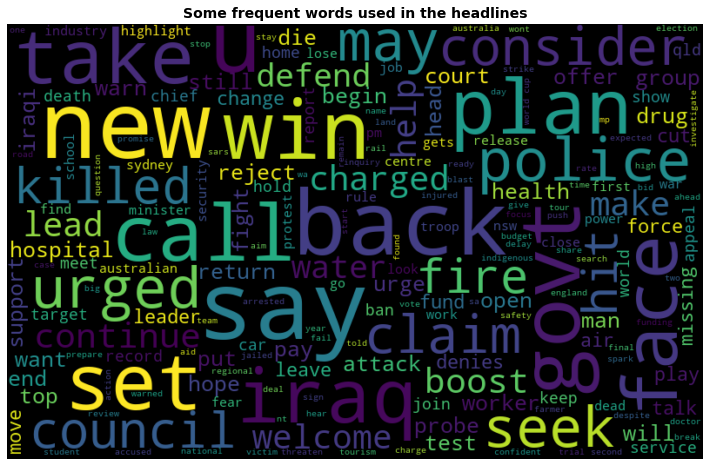

In [2]:
from wordcloud import WordCloud

all_words = "".join([word for word in headlines["headline_text"][0:100000]])
all_words
wordcloud = WordCloud(
    width=800, height=500, random_state=21, max_font_size=110
).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Some frequent words used in the headlines", weight="bold", fontsize=14)
plt.show()

In [2]:
def build_corpus(data):
    corpus = []
    for sentence in data.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

corpus = build_corpus(headlines['headline_text'])

In [3]:
#!pip install --upgrade gensim==3.8.3 --user
from gensim.models import Word2Vec
model = Word2Vec(corpus, size=100, min_count=1)

vectors = model[model.wv.vocab]
words = list(model.wv.vocab)

<ipython-input-3-6024d8559ca1>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors = model[model.wv.vocab]


In [4]:
X = pd.concat([pd.DataFrame(words, columns=['word']), pd.DataFrame(vectors)], axis=1)

In [5]:
X_vectors = X.drop(['word'], axis=1)

In [6]:
from sklearn.cluster import KMeans
from sklearn import cluster, metrics, mixture
from scipy.spatial.distance import cdist

In [9]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_vectors)
    kmeanModel.fit(X_vectors)
  
    distortions.append(sum(np.min(cdist(X_vectors, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_vectors.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X_vectors, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_vectors.shape[0]
    mapping2[k] = kmeanModel.inertia_

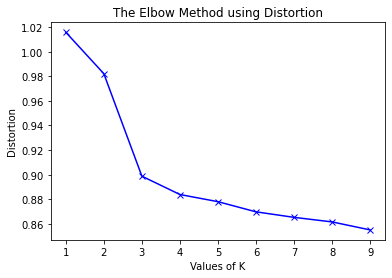

In [10]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

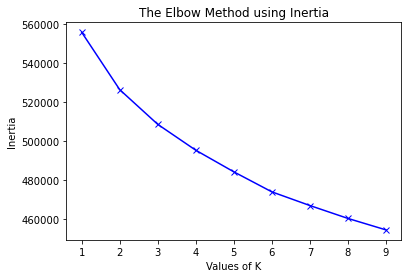

In [11]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

filtering by only 100 the most frequent words

In [7]:
def get_top_n_words(corpus, n=10):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [8]:
top100_frequencies = get_top_n_words(headlines["headline_text"], 100)
top100 = [i[0] for i in top100_frequencies]

In [9]:
X100 = X[X['word'].isin(top100)]

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X100.drop(['word'], axis=1))

In [11]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 68, 0: 7, 2: 25})

In [12]:
X100_ = pd.concat([X100, pd.DataFrame(kmeans.labels_, columns=['label'], index=X100.index)], axis=1)

In [13]:
from PIL import Image # converting images into arrays
import matplotlib.pyplot as plt # for visualizing the data

In [14]:
dct = {}
for label in X100_.label.unique():
    dct[f'cluster_{label}'] = (X100_['word'].loc[X100_['label'] == label].tolist())

In [15]:
dct

{'cluster_1': ['act',
  'calls',
  'rise',
  'australian',
  'council',
  'australia',
  'plans',
  'plan',
  'boost',
  'water',
  'win',
  'urged',
  'final',
  'help',
  'south',
  'govt',
  'nsw',
  'national',
  'work',
  'gold',
  'coast',
  'ban',
  'group',
  'north',
  'west',
  'wa',
  'mp',
  'health',
  'minister',
  'open',
  'qld',
  'nt',
  'new',
  'says',
  'world',
  'face',
  'farmers',
  'public',
  'report',
  'sa',
  'day',
  'set',
  'high',
  'funding',
  'centre',
  'indigenous',
  'fears',
  'pm',
  'melbourne',
  'talks',
  'labor',
  'business',
  'election',
  'adelaide',
  'deal',
  'road',
  'power',
  'market',
  'year',
  'china',
  'rural',
  'workers',
  'test',
  'budget',
  'queensland',
  'sydney',
  'government',
  'coronavirus'],
 'cluster_0': ['wins',
  'charged',
  'killed',
  'charges',
  'dead',
  'dies',
  'interview'],
 'cluster_2': ['home',
  'death',
  'crash',
  'court',
  'accused',
  'police',
  'house',
  'man',
  'murder',
  'case',


In [17]:
headlines_concat = headlines.copy()
#headlines_concat['headline_text'] = headlines_concat.groupby(['month_year'])['headline_text'].transform(lambda x : ' '.join(x))
#headlines_concat.drop_duplicates(inplace=True)   

In [ ]:
#headlines_concat.drop(['publish_date'], axis=1, inplace=True)

In [ ]:
#headlines_concat.drop_duplicates(inplace=True)   

In [ ]:
X_vectors = X.drop(['word'], axis=1)
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_vectors)
    kmeanModel.fit(X_vectors)
  
    distortions.append(sum(np.min(cdist(X_vectors, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_vectors.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X_vectors, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_vectors.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [37]:
year_month = '2020-03'
headlines["month_year"] = headlines["publish_date"].dt.to_period("M")
corpus = build_corpus(headlines.loc[headlines['month_year'] == year_month].headline_text)
model = Word2Vec(corpus, size=300, min_count=1)

vectors = model[model.wv.vocab]
words = list(model.wv.vocab)
X = pd.concat([pd.DataFrame(words, columns=['word']), pd.DataFrame(vectors)], axis=1)

top100_frequencies = get_top_n_words(headlines.loc[headlines['month_year'] == year_month].headline_text, 50)
top100 = [i[0] for i in top100_frequencies]

kmeans = KMeans(n_clusters=5, random_state=0).fit(X.drop(['word'], axis=1))

X_ = pd.concat([X, pd.DataFrame(kmeans.labels_, columns=['label'], index=X.index)], axis=1)

X100 = X_[X_['word'].isin(top100)]

dct = {}
for label in X_.label.unique():
    dct[f'cluster_{label}'] = (X100['word'].loc[X100['label'] == label].tolist())
display(Counter(kmeans.labels_))
#display(dct)

<ipython-input-37-aea20ade4fe7>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors = model[model.wv.vocab]


Counter({0: 4710, 4: 184, 3: 664, 2: 36, 1: 6})

In [38]:
from sklearn.decomposition import PCA

# fit a 2d PCA model to the vectors

pca = PCA(n_components=2)
PCA_result = pca.fit_transform(vectors)
# prepare a dataframe
words = pd.DataFrame(words)
PCA_result = pd.DataFrame(PCA_result)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
clusters = pd.DataFrame(kmeans.labels_, columns=['label'], index=PCA_final.index)
PCA_data_complet = pd.concat([PCA_final[['word','x_values','y_values']], clusters], axis=1)
PCA_data_complet100 = PCA_data_complet[PCA_data_complet['word'].isin(top100)]

In [ ]:
import plotly.express as px
PCA_data_complet100.label = PCA_data_complet100.label.astype(str)
fig = px.scatter(PCA_data_complet100, x="x_values", y="y_values", color='label', width=500, height=400)
fig.show()

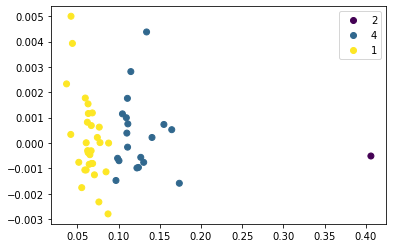

In [57]:
import matplotlib.pyplot as plt
plot = plt.scatter(PCA_data_complet100.x_values, PCA_data_complet100.y_values, c=PCA_data_complet100.label)
plt.legend(handles=plot.legend_elements()[0], labels=list(PCA_data_complet100.label.unique()))
plt.show()

In [60]:
dct.get('cluster_4')

['south',
 'death',
 'cruise',
 'morrison',
 'fears',
 'italy',
 'lockdown',
 'updates',
 'live',
 'trump',
 'afl',
 'season',
 'school',
 'victoria',
 'close',
 'quarantine',
 'home',
 'tasmania',
 'outbreak',
 'sa',
 'nt',
 'social',
 'people',
 'stimulus',
 'workers',
 'health',
 'covid19',
 'pandemic',
 'schools',
 'package']

In [22]:
from sklearn.manifold import TSNE
tSNE_result = pd.DataFrame(TSNE(n_components=2).fit_transform(vectors))
tSNE_result['x_values'] = tSNE_result.iloc[0:, 0]
tSNE_result['y_values'] = tSNE_result.iloc[0:, 1]
tSNE_result = pd.merge(words, tSNE_result, left_index=True, right_index=True)
tSNE_result['word'] = tSNE_result.iloc[0:, 0]
clusters = pd.DataFrame(kmeans.labels_, columns=['label'], index=tSNE_result.index)
tSNE_result = pd.concat([tSNE_result[['word','x_values','y_values']], clusters], axis=1)
tSNE_result100 = tSNE_result[tSNE_result['word'].isin(top100)]

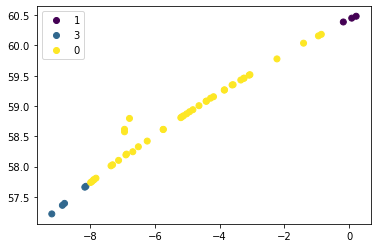

In [23]:
plot = plt.scatter(tSNE_result100.x_values, tSNE_result100.y_values, c=tSNE_result100.label)
plt.legend(handles=plot.legend_elements()[0], labels=list(tSNE_result100.label.unique()))
plt.show()